# ANA680 Final Project-Week4

Instructions:

In this project, you will implement the stack of technologies you learned throughout this course. The project has multiple parts. You must create a new GitHub repository for this project. Complete each part and ensure all artifacts are accessible to your instructor on GitHub.

    1-Define the problem you are trying to solve and why machine learning will provide the best solution for this problem. Identify the dataset you plan to use for this project and its location.

    2-Perform data exploration, data cleaning, feature engineering and selection on Jupyter Notebook or Google Colab.

    3-Split data into testing, training, and validation; select training algorithm(s) and metrics to train the model and evaluate its performance. Save the project as ipynb and. pkl in GitHub.

    4-Deploy the model on a local machine using FLASK.
    
    5-Turn the model in step 4 into a container and push it to your Docker Hub.

    6-Create a CI/CD pipeline for this project and deploy it on Heroku. Ensure all the necessary files are in GitHub.

    7-Redo the project on AWS EC2 using containers. Provide screenshots 
    
    8-Deploy your model using SageMaker notebook. Provide screenshots

# Project idea:

https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset/data

About Dataset
Traffic congestion and related problems are a common concern in urban areas. Understanding traffic patterns and analyzing data can provide valuable insights for transportation planning, infrastructure development, and congestion management.

What exactly is this dataset and how was it created?
it is a valuable resource for studying traffic conditions as it contains information collected by a computer vision model. The model detects four classes of vehicles: cars, bikes, buses, and trucks. The dataset is stored in a CSV file and includes additional columns such as time in hours, date, days of the week, and counts for each vehicle type (CarCount, BikeCount, BusCount, TruckCount). The "Total" column represents the total count of all vehicle types detected within a 15-minute duration.

The dataset is updated every 15 minutes, providing a comprehensive view of traffic patterns over the course of one month. Additionally, the dataset includes a column indicating the traffic situation categorized into four classes: 1-Heavy, 2-High, 3-Normal, and 4-Low. This information can help assess the severity of congestion and monitor traffic conditions at different times and days of the week.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df=pd.read_csv("Traffic.csv", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",df.shape)

#Replace all feature names with spaces with underscores
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100
print(pd.DataFrame({'Data Type:': df.dtypes,'missing': missing_values, 'pc_missing': percentage_missing.round(2)}))

Shape of dataset: (2976, 9)
                  Data Type:  missing  pc_missing
Time                  object        0         0.0
Date                   int64        0         0.0
Day_of_the_week       object        0         0.0
CarCount               int64        0         0.0
BikeCount              int64        0         0.0
BusCount               int64        0         0.0
TruckCount             int64        0         0.0
Total                  int64        0         0.0
Traffic_Situation     object        0         0.0


In [3]:
# Check for duplicated data:

duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicate rows found.


In [4]:
print("First 10 lines of dataset:")
df.head(10)

First 10 lines of dataset:


,Time,Date,Day_of_the_week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
5,1:15:00 AM,10,Tuesday,44,0,5,4,53,low
6,1:30:00 AM,10,Tuesday,37,0,1,4,42,low
7,1:45:00 AM,10,Tuesday,42,4,4,5,55,low
8,2:00:00 AM,10,Tuesday,51,0,9,7,67,low
9,2:15:00 AM,10,Tuesday,34,0,4,7,45,low


In [5]:
df['Traffic_Situation'].value_counts() # number of rows (observations) in each class

normal    1669
heavy      682
high       321
low        304
Name: Traffic_Situation, dtype: int64

In [6]:
df['Date'].value_counts().sort_index()

1     96
2     96
3     96
4     96
5     96
6     96
7     96
8     96
9     96
10    96
11    96
12    96
13    96
14    96
15    96
16    96
17    96
18    96
19    96
20    96
21    96
22    96
23    96
24    96
25    96
26    96
27    96
28    96
29    96
30    96
31    96
Name: Date, dtype: int64

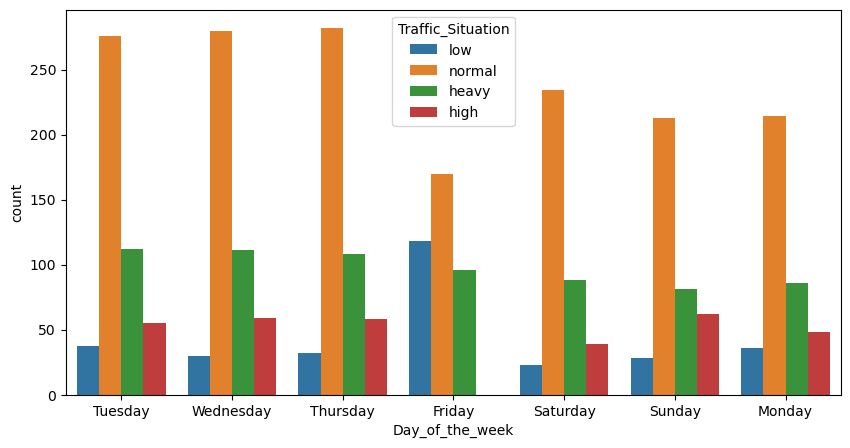

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Day_of_the_week", hue="Traffic_Situation", data=df)
plt.show()

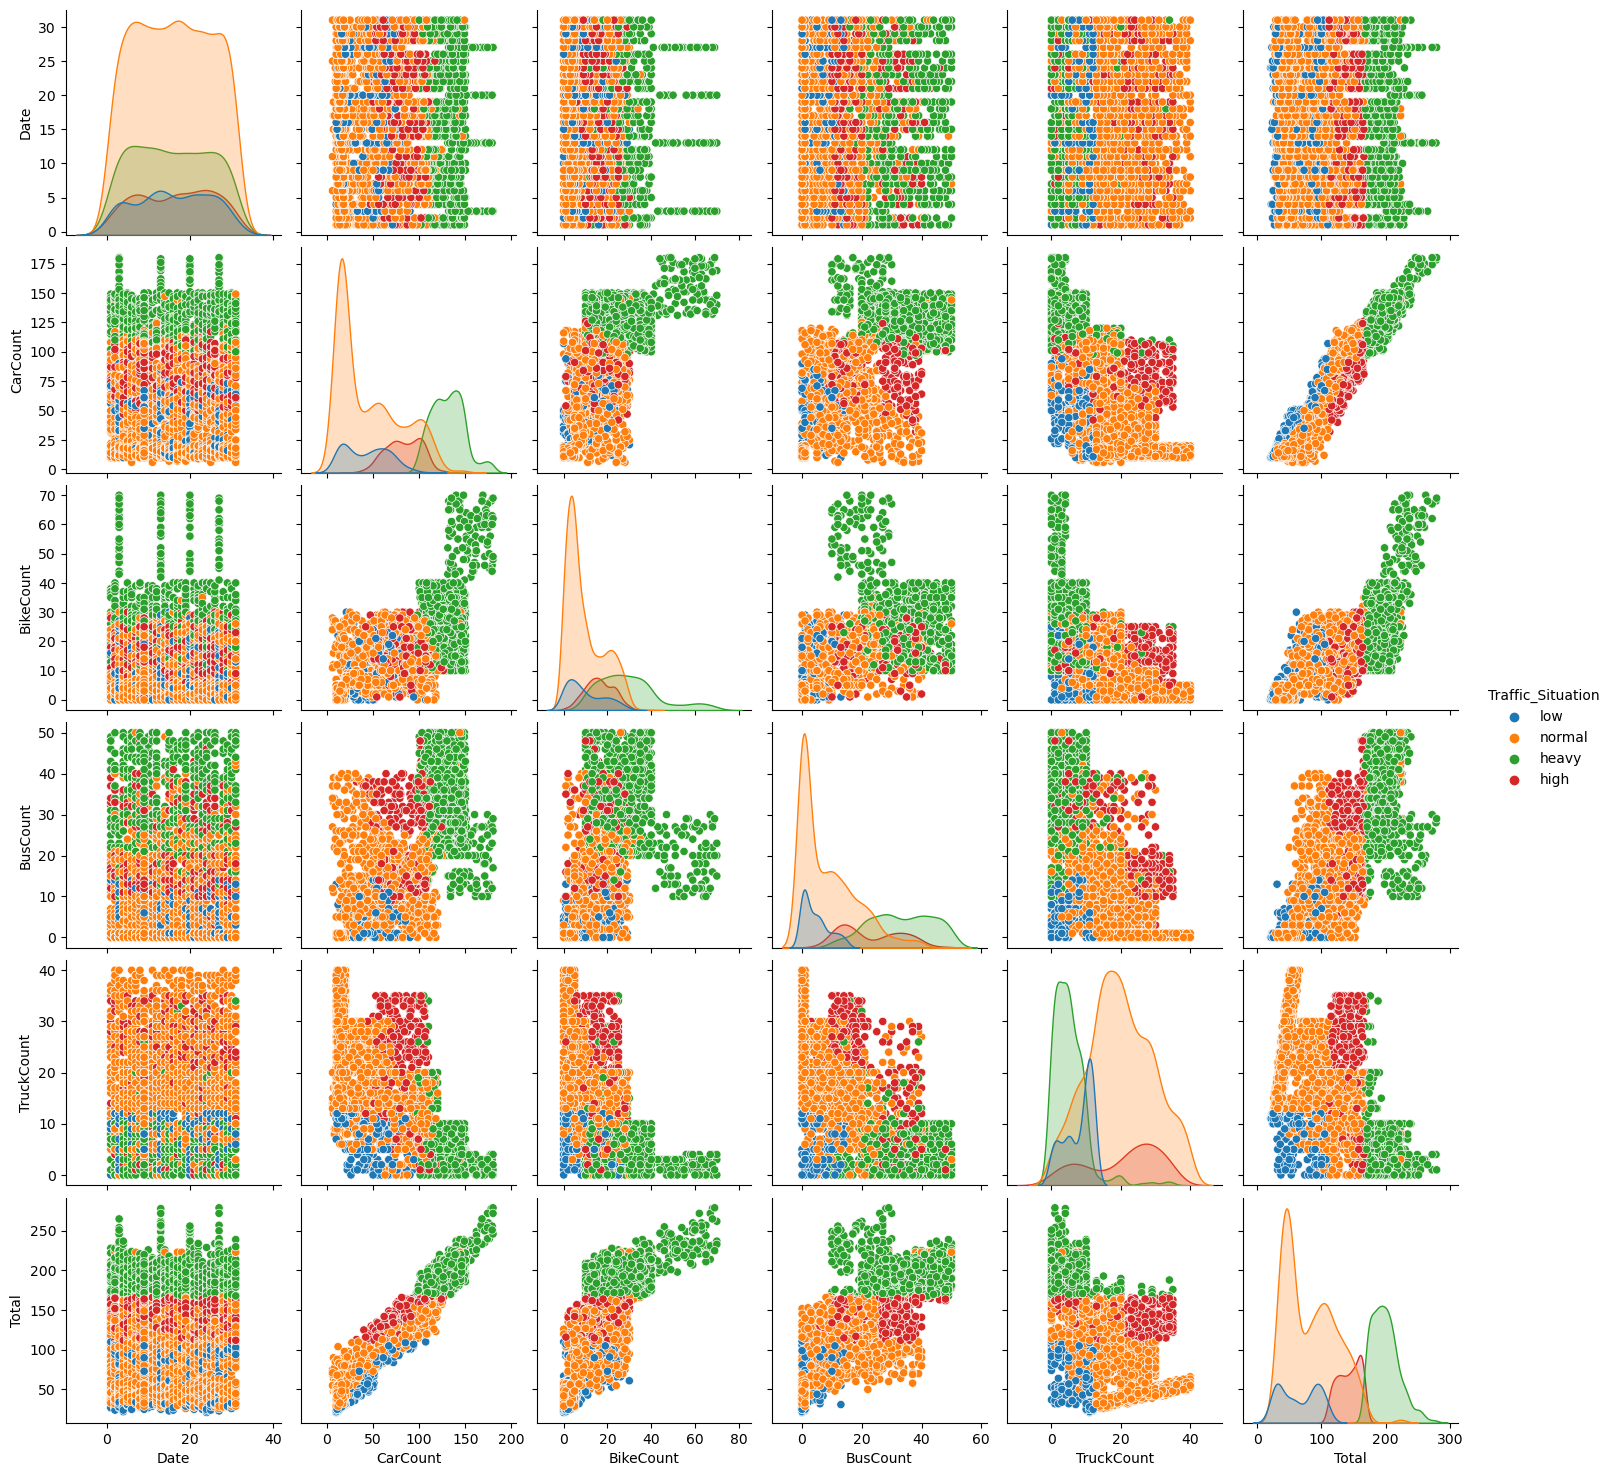

In [8]:
sns.pairplot(df, hue='Traffic_Situation') # Plotting multiple pairwise bivariate distributions in a the dataset
plt.show()

In [9]:
# from sklearn.preprocessing import LabelEncoder
    # encoder = LabelEncoder()
    # df["Day"] = encoder.fit_transform(df["Day_of_the_week"])
    # df["Traffic_Situation"] = encoder.fit_transform(df["Traffic_Situation"])
    # # Extracting Specific time-related information from 'Time(24:00 am/pm)' column
    # df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M')  # Convert to 24-hour format
#Above Code is not using.

#Extracting Specific time-related information from 'Time(24:00 am/pm)' column
df['hour'] = pd.to_datetime(df['Time']).dt.hour #Hour in separate column
df['minute'] = pd.to_datetime(df['Time']).dt.minute #Minute in separate column

#Converting Days of weak into Numeric form
df['Day_of_the_week'] = df['Day_of_the_week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

#Converting target variable 'Traffic Situation' into Numeric form
df['Traffic_Situation'] = df['Traffic_Situation'].replace({'low':0, 'normal':1,'heavy':2, 'high':3})

#Drop Time column because it's object, and no use.
df.drop('Time', axis=1)

df.head(10)

,Time,Date,Day_of_the_week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation,hour,minute
0,12:00:00 AM,10,2,31,0,4,4,39,0,0,0
1,12:15:00 AM,10,2,49,0,3,3,55,0,0,15
2,12:30:00 AM,10,2,46,0,3,6,55,0,0,30
3,12:45:00 AM,10,2,51,0,2,5,58,0,0,45
4,1:00:00 AM,10,2,57,6,15,16,94,1,1,0
5,1:15:00 AM,10,2,44,0,5,4,53,0,1,15
6,1:30:00 AM,10,2,37,0,1,4,42,0,1,30
7,1:45:00 AM,10,2,42,4,4,5,55,0,1,45
8,2:00:00 AM,10,2,51,0,9,7,67,0,2,0
9,2:15:00 AM,10,2,34,0,4,7,45,0,2,15


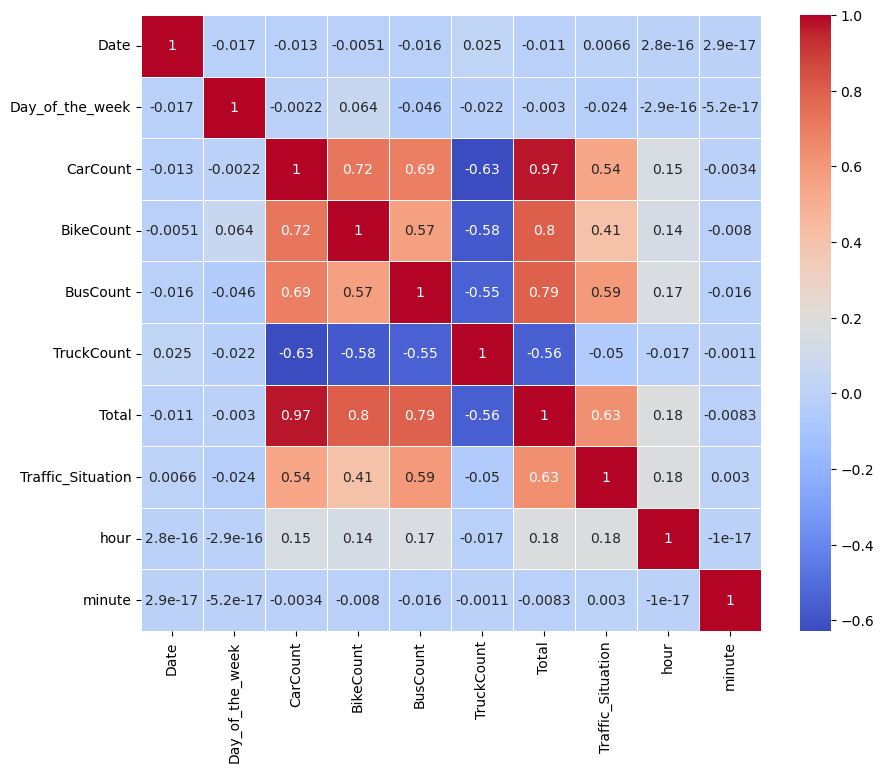

In [10]:
# Heatmap for all numeric features of the dataset.

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Correlation values for highly correlated features:
CarCount             0.541
BikeCount            0.407
BusCount             0.590
Total                0.631
Traffic_Situation    1.000
Name: Traffic_Situation, dtype: float64


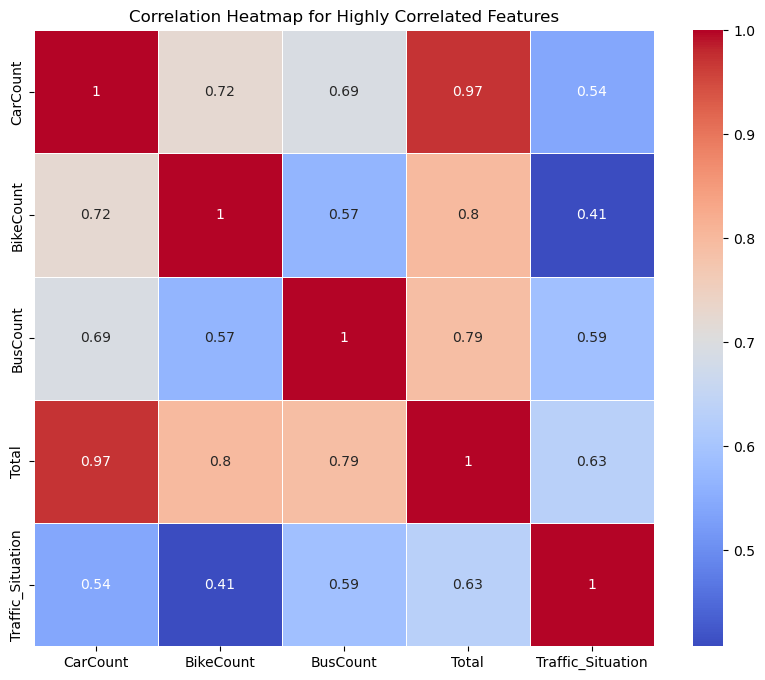

In [11]:
# We are selecting feature that had correlation over 0.20 with target feature 'class'.

target_variable = 'Traffic_Situation'

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Find features with a correlation above 0.70 with the 'class' variable
highly_correlated_features = correlation_matrix.index[abs(correlation_matrix['Traffic_Situation']) > 0.2]

# Filter the correlation matrix for highly correlated features
highly_correlated_matrix = correlation_matrix.loc[highly_correlated_features, highly_correlated_features]

# Display correlation values
print("Correlation values for highly correlated features:")
print(correlation_matrix[target_variable][highly_correlated_features].round(3))

# Create a heatmap for highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Highly Correlated Features")
plt.show()

Correlation values for highly correlated features:
Day_of_the_week   -0.024
CarCount           0.541
BikeCount          0.407
BusCount           0.590
TruckCount        -0.050
hour               0.175
minute             0.003
Name: Traffic_Situation, dtype: float64


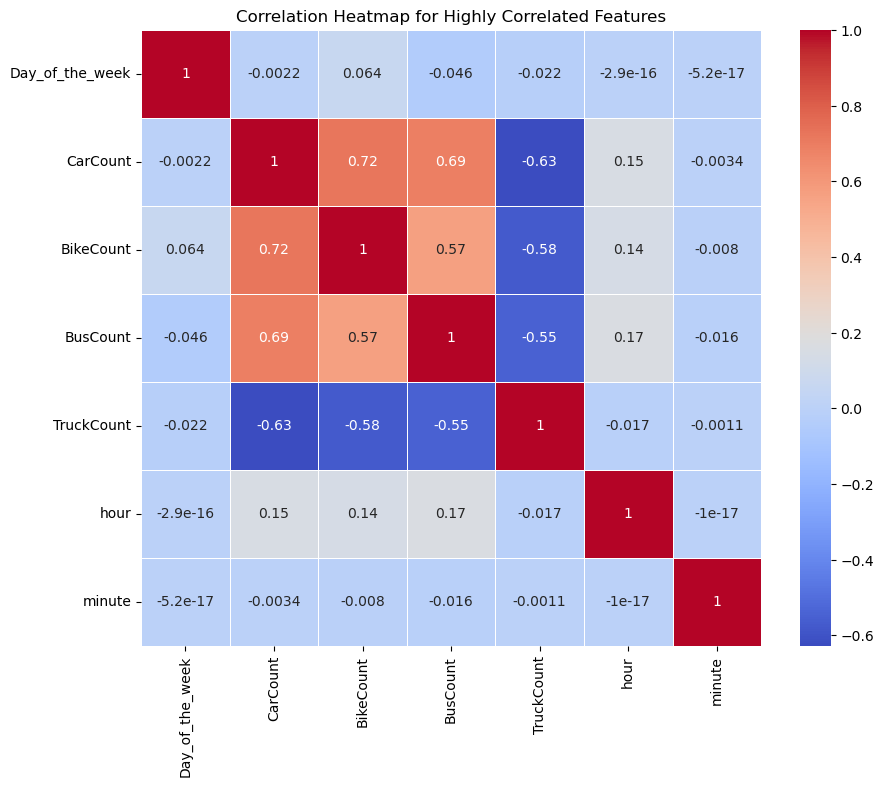

In [12]:
# Feature selected base on command understand of the traffic not correlation.

target_variable = 'Traffic_Situation'

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Selected Features
selected_features = ['Day_of_the_week', 'CarCount', 'BikeCount','BusCount', 'TruckCount','hour', 'minute']

# Filter the correlation matrix for highly correlated features
highly_correlated_matrix = correlation_matrix.loc[selected_features, selected_features]

# Display correlation values
print("Correlation values for highly correlated features:")
print(correlation_matrix[target_variable][selected_features].round(3))

# Create a heatmap for highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Highly Correlated Features")
plt.show()

# Train the model!

In [13]:
# features_df = df.drop(['Time','Date','Day_of_the_week','Total','hour','minute', 'Traffic_Situation'], axis=1)
# features_df = df.drop(['Time','Date','CarCount', 'BikeCount','BusCount','TruckCount','Traffic_Situation'], axis=1)

features_df = df.drop(['Time','Date','Total', 'Traffic_Situation'], axis=1)

target_df = df['Traffic_Situation']

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(features_df, target_df, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the resulting dataframes
print("Shape of X_train:", X_train.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of X_test:", X_test.shape)

print("\nShape of y_train:", y_train.shape)
print("Shape of y_validation:", y_validation.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (2083, 7)
Shape of X_validation: (446, 7)
Shape of X_test: (447, 7)

Shape of y_train: (2083,)
Shape of y_validation: (446,)
Shape of y_test: (447,)


In [14]:
# Check for missing values
missing_values = features_df.isnull().sum()
percentage_missing = (missing_values / len(features_df)) * 100
print(pd.DataFrame({'Data Type:': features_df.dtypes,'missing': missing_values, 'pc_missing': percentage_missing.round(2)}))


                Data Type:  missing  pc_missing
Day_of_the_week      int64        0         0.0
CarCount             int64        0         0.0
BikeCount            int64        0         0.0
BusCount             int64        0         0.0
TruckCount           int64        0         0.0
hour                 int64        0         0.0
minute               int64        0         0.0


In [15]:
features_df.describe().round(3)

,Day_of_the_week,CarCount,BikeCount,BusCount,TruckCount,hour,minute
count,2976.000,2976.000,2976.000,2976.000,2976.000,2976.000,2976.000
mean,3.903,68.697,14.917,15.280,15.325,11.500,22.500
std,1.941,45.851,12.848,14.342,10.604,6.923,16.773
min,1.000,6.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,19.000,5.000,1.000,6.000,5.750,11.250
50%,4.000,64.000,12.000,12.000,14.000,11.500,22.500
75%,6.000,107.000,22.000,25.000,23.000,17.250,33.750
max,7.000,180.000,70.000,50.000,40.000,23.000,45.000


In [16]:
from xgboost import XGBClassifier
model = XGBClassifier()

# Train the model using the training set
model.fit(X_train, y_train)

# Predict on the validation set
prediction = model.predict(X_validation)

print(f'Validation Accuracy: {accuracy_score(y_validation, prediction)}')
print(f'Classification Report (Validation): \n {classification_report(y_validation, prediction, zero_division=1)}')

Validation Accuracy: 0.9663677130044843
Classification Report (Validation): 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.98      0.98      0.98       249
           2       0.94      0.96      0.95       107
           3       0.93      0.90      0.92        42

    accuracy                           0.97       446
   macro avg       0.96      0.95      0.96       446
weighted avg       0.97      0.97      0.97       446



In [17]:
import pickle
# Open a file and use dump() 
with open('file_Traffic.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(model, file)

In [18]:
# Check and display actual, predicted, and validation values
validation_results = pd.DataFrame({'Actual': y_validation, 'Prediction': prediction})
print(validation_results)

      Actual  Prediction
644        2           2
2043       2           2
2530       2           2
602        2           2
942        1           1
...      ...         ...
1800       2           2
2357       2           2
48         1           1
1027       0           0
705        2           2

[446 rows x 2 columns]


THANKS!